### 1. Loading packages

In [1]:
library("cjoint")
library("cregg")


Loading required package: sandwich
Loading required package: lmtest
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: ggplot2
Loading required package: survey
Loading required package: grid
Loading required package: Matrix
Loading required package: survival

Attaching package: ‘survey’

The following object is masked from ‘package:graphics’:

    dotchart

cjoint: AMCE Estimator for Conjoint Experiments
Version: 2.0.6
Authors: Soubhik Barari, Elissa Berwick, Jens Hainmueller, Daniel Hopkins, Sean Liu, Anton Strezhnev, Teppei Yamamoto


Attaching package: ‘cregg’

The following object is masked from ‘package:cjoint’:

    amce



#### a. For rearranging facet plot in ggplots

In [2]:
library("grid")
library("gtable")

#### b. For showing layout of ggplots 

In [3]:
library("lemon")

### 2. Loading the candidate round data

In [4]:
load("candidate.rda")

### 3. Specifying the formula containing variables

In [5]:
f1 <- ChosenCandidate ~ FeatGender + FeatPartyID + FeatEUIntegration + FeatScandal

### 4. Respecifying the order and labels of the variables

#### a. Respecifying the order of the variables

In [6]:
feat_list <- c("FeatGender", "FeatPartyID", "FeatEUIntegration", "FeatScandal")

#### b. Rspecifying the order of levels of each variable

In [7]:
candidate$FeatGender <- factor(candidate$FeatGender, levels = c("Female", "Male"))
candidate$FeatPartyID <- factor(candidate$FeatPartyID, levels = c("Labour Party", "Conservative Party", 
							    "Liberal Democrats"))
candidate$FeatEUIntegration <- factor(candidate$FeatEUIntegration, levels = c("Oppose EU Integration", 
								      "Support EU Integration", "Neutral"))
candidate$FeatScandal <- factor(candidate$FeatScandal, levels = c("No Scandal", "Plagiarism", 
							    "Having an Extramarital Affair", "Misreporting Funds", "Sexual Harassment"))

#### c. Respecifying the label of each variable

In [8]:
feature_order_list <- list()
feature_order_list[["FeatGender"]] <- "Gender"
feature_order_list[["FeatPartyID"]] <- "PartyID"
feature_order_list[["FeatEUIntegration"]] <- "EUIntegration"
feature_order_list[["FeatScandal"]] <- "Scandal"

### 5. Unconditional AMCE

#### a. Table

In [9]:
unround1 <- amce(candidate, f1, id = ~CaseID, feature_order=feat_list, feature_labels = feature_order_list, 
                 level_order=c("ascending"))
unround1

outcome,statistic,feature,level,estimate,std.error,z,p,lower,upper
ChosenCandidate,amce,Gender,Female,0.00000000,NA,NA,NA,NA,NA
ChosenCandidate,amce,Gender,Male,-0.02389641,0.01734413,-1.377781,1.682709e-01,-0.05789028,0.01009745
ChosenCandidate,amce,PartyID,Labour Party,0.00000000,NA,NA,NA,NA,NA
ChosenCandidate,amce,PartyID,Conservative Party,-0.06460598,0.02428423,-2.660409,7.804591e-03,-0.11220219,-0.01700976
ChosenCandidate,amce,PartyID,Liberal Democrats,-0.02605037,0.02231633,-1.167323,2.430798e-01,-0.06978956,0.01768883
ChosenCandidate,amce,EUIntegration,Oppose EU Integration,0.00000000,NA,NA,NA,NA,NA
ChosenCandidate,amce,EUIntegration,Support EU Integration,0.18373743,0.02711743,6.775622,1.238725e-11,0.13058825,0.23688661
ChosenCandidate,amce,EUIntegration,Neutral,0.16490713,0.02158181,7.641022,2.155040e-14,0.12260755,0.20720671
ChosenCandidate,amce,Scandal,No Scandal,0.00000000,NA,NA,NA,NA,NA
ChosenCandidate,amce,Scandal,Plagiarism,-0.20779943,0.02836200,-7.326684,2.359168e-13,-0.26338793,-0.15221093


#### b. Plot

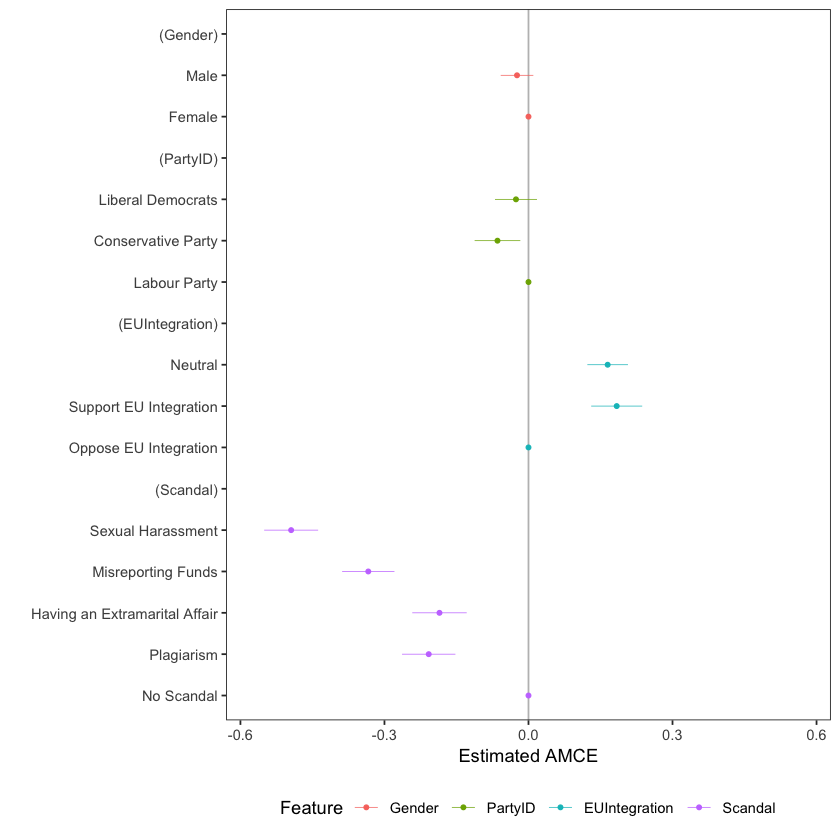

In [10]:
plot(unround1, level_order=c("decending"))

### 6. Conditional AMCE

#### a. Table

In [11]:
cnround1 <- cj(candidate, f1, id = ~CaseID, estimate = "mm", feature_labels = feature_order_list, by = ~Gender)
cnround1

BY,outcome,statistic,feature,level,estimate,std.error,z,p,lower,upper,Gender
Female,ChosenCandidate,mm,Gender,Female,0.5166320,0.01611278,32.06349,1.423975e-225,0.4850515,0.5482125,Female
Female,ChosenCandidate,mm,Gender,Male,0.4830867,0.01624816,29.73177,2.983980e-194,0.4512409,0.5149325,Female
Female,ChosenCandidate,mm,PartyID,Labour Party,0.5449190,0.01911190,28.51202,8.311314e-179,0.5074604,0.5823776,Female
Female,ChosenCandidate,mm,PartyID,Conservative Party,0.4456869,0.01986707,22.43345,1.856650e-111,0.4067482,0.4846256,Female
Female,ChosenCandidate,mm,PartyID,Liberal Democrats,0.5058043,0.02036154,24.84117,3.221616e-136,0.4658964,0.5457122,Female
Female,ChosenCandidate,mm,EUIntegration,Oppose EU Integration,0.3448845,0.01931025,17.86018,2.408762e-71,0.3070371,0.3827319,Female
Female,ChosenCandidate,mm,EUIntegration,Support EU Integration,0.5969231,0.01924088,31.02369,2.583717e-211,0.5592116,0.6346345,Female
Female,ChosenCandidate,mm,EUIntegration,Neutral,0.5475460,0.01949405,28.08785,1.378874e-173,0.5093384,0.5857537,Female
Female,ChosenCandidate,mm,Scandal,No Scandal,0.7713499,0.02204381,34.99168,3.010656e-268,0.7281448,0.8145549,Female
Female,ChosenCandidate,mm,Scandal,Plagiarism,0.5094340,0.02595579,19.62699,9.094471e-86,0.4585616,0.5603064,Female


#### b. Parallel plot

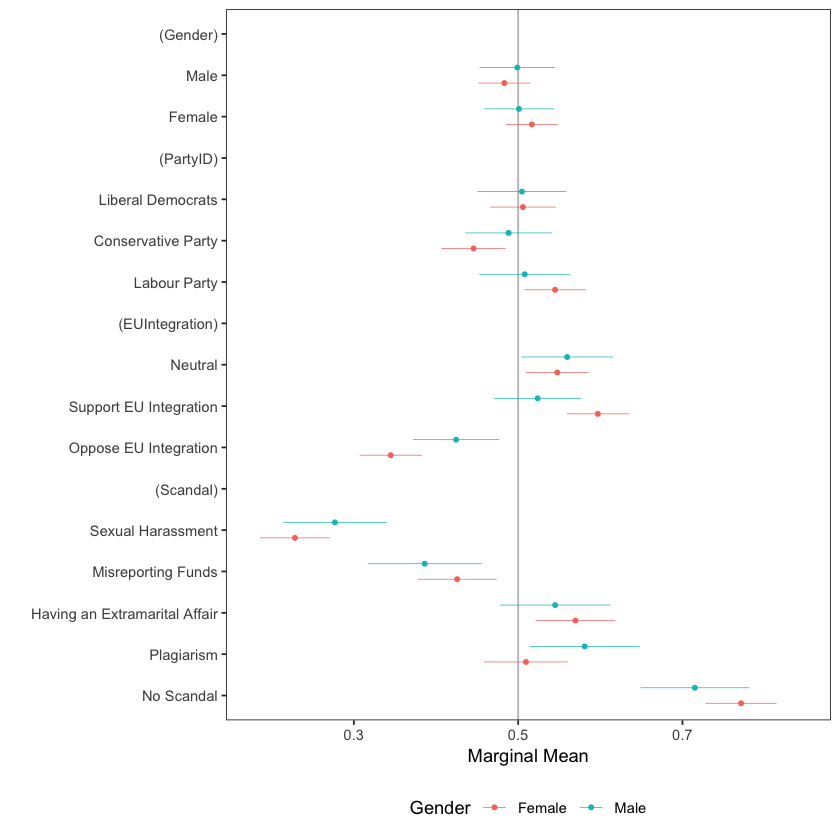

In [12]:
plot(cnround1, group = "Gender", vline = 0.5)

#### c. Plot by facets

##### i. Checking the structure of the plot

In [13]:
pltr1 <- plot(cnround1, vline = 0.5) + ggplot2::facet_wrap(~Gender, nrow=1L)
gtr1 = ggplot_gtable(ggplot_build(pltr1))
print(gtr1)

TableGrob (15 x 17) "layout": 28 grobs
    z         cells        name                                          grob
1   0 ( 1-15, 1-17)  background               rect[plot.background..rect.340]
2   1 ( 8- 8, 5- 5)   panel-1-1                      gTree[panel-1.gTree.172]
3   1 ( 8- 8, 9- 9)   panel-2-1                      gTree[panel-2.gTree.183]
4   1 ( 8- 8,13-13)   panel-3-1                      gTree[panel-3.gTree.194]
5   3 ( 6- 6, 5- 5)  axis-t-1-1                                zeroGrob[NULL]
6   3 ( 6- 6, 9- 9)  axis-t-2-1                                zeroGrob[NULL]
7   3 ( 6- 6,13-13)  axis-t-3-1                                zeroGrob[NULL]
8   3 ( 9- 9, 5- 5)  axis-b-1-1           absoluteGrob[GRID.absoluteGrob.201]
9   3 ( 9- 9, 9- 9)  axis-b-2-1           absoluteGrob[GRID.absoluteGrob.201]
10  3 ( 9- 9,13-13)  axis-b-3-1           absoluteGrob[GRID.absoluteGrob.201]
11  3 ( 8- 8,12-12)  axis-l-1-3                                zeroGrob[NULL]
12  3 ( 8- 8, 8- 8)  axis

##### ii. Showing plot layout

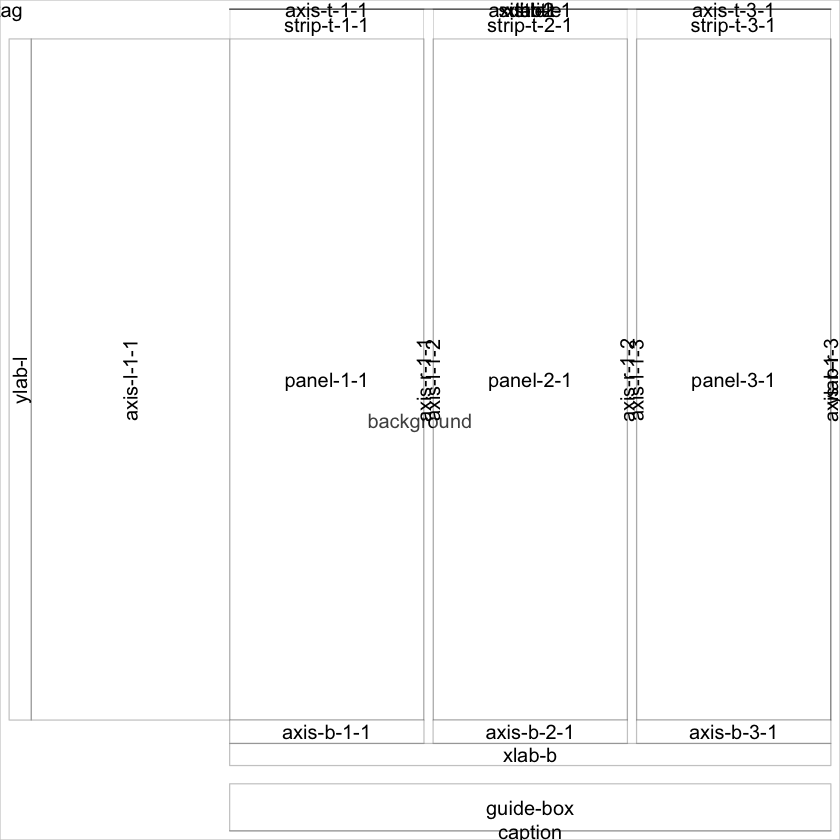

In [14]:
gtable_show_names(gtr1)

##### iii. Removing everything related to panel -3-

In [15]:
rm_grobs <- gtr1$layout$name %in% c("panel-3-1", "strip-t-3-1", 
                                    "axis-t-3-1", "axis-b-3-1",
                                    "axis-l-1-3", "axis-r-1-3", "ylab-r")

##### iv. Removing grobs

In [16]:
gtr1$grobs[rm_grobs] <- NULL
gtr1$layout <- gtr1$layout[!rm_grobs, ]

##### v. Checking results

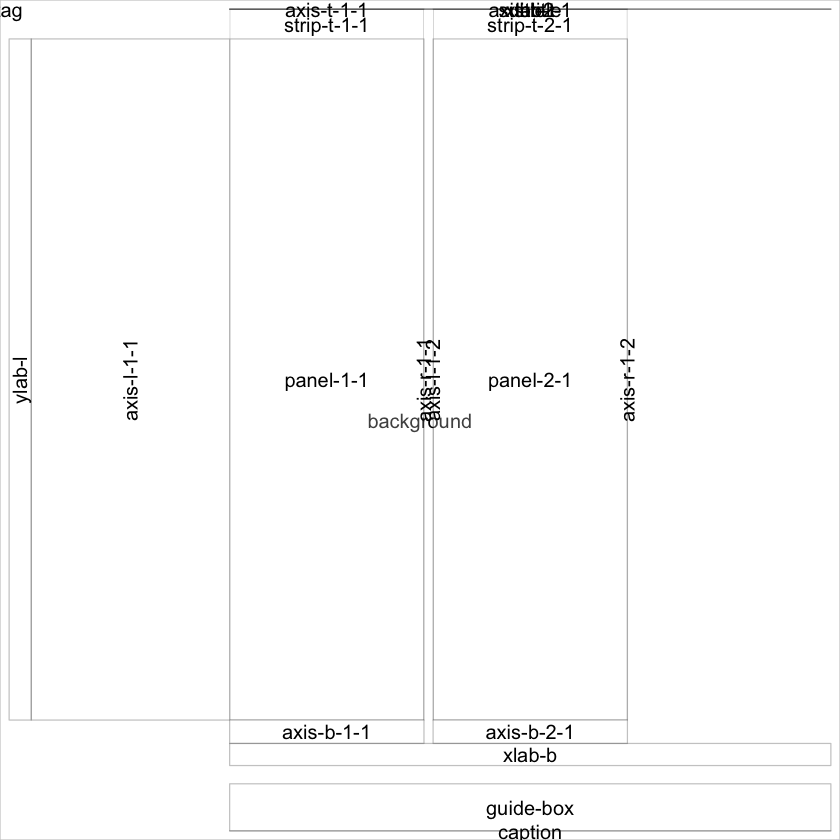

In [17]:
gtable_show_names(gtr1)

##### vi. Removing the space left over

In [18]:
names(gtr1)
gtr1$widths

[1] "grobs"         "layout"        "widths"        "heights"      
 [5] "respect"       "rownames"      "colnames"      "name"         
 [9] "gp"            "vp"            "children"      "childrenOrder"

 [1] 5.5pt              0cm                1grobwidth         4.20019010273973cm
 [5] 1null              0cm                5.5pt              0cm               
 [9] 1null              0cm                5.5pt              0cm               
[13] 1null              0cm                0cm                0pt               
[17] 5.5pt             

##### vii. Respecifying the first elment of the last line

In [19]:
gtr1$widths[13] = unit(0, "cm")

##### viii. Respecifying the last element

In [20]:
gtr1$widths[17] = unit(0, "cm")

##### ix. Checking the layout again

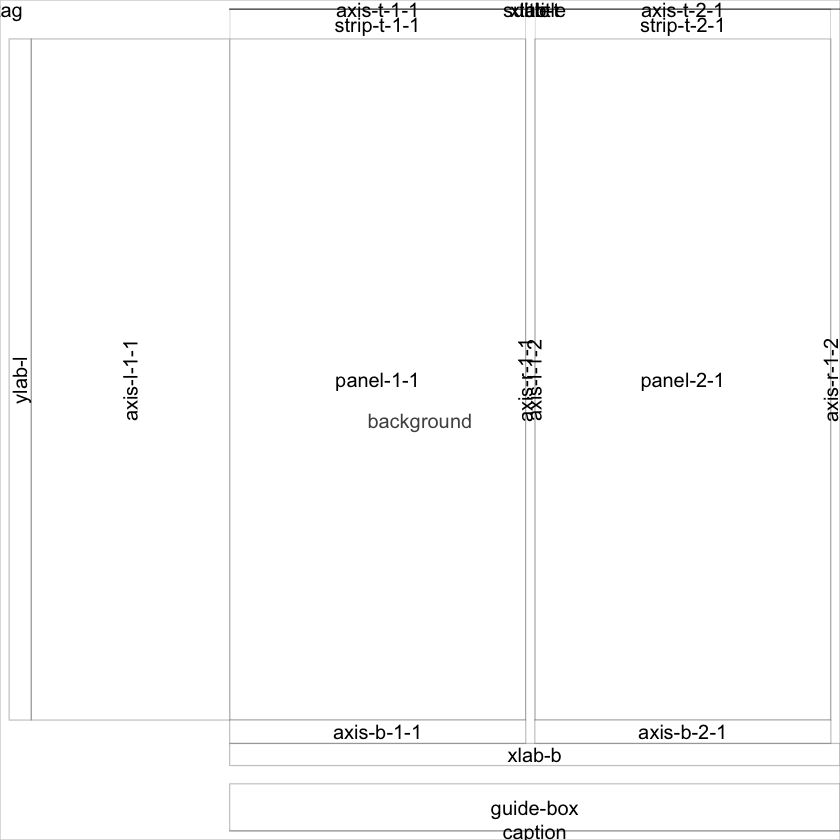

In [21]:
gtable_show_names(gtr1)

##### x. Plot

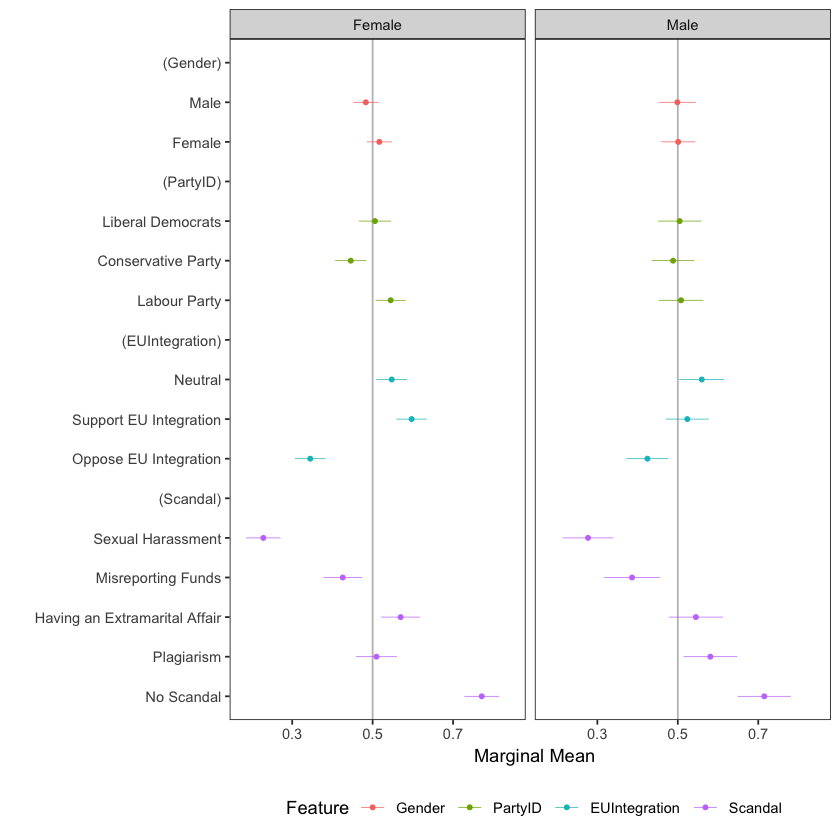

In [22]:
grid.draw(gtr1)